# Problem statement

Estimate the total compansation to be provided to an employe

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [210]:
# Importing data
data=pd.read_csv(r'E:\Data Is Everything\Edyoda\train_set.csv')
data.head(50)

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.000000,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.310000,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.500000,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.870000,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.280000,Calendar,82106
5,2014,6,General Administration & Finance,TTX,Treasurer/Tax Collector,790,"SEIU - Miscellaneous, Local 1021",Revenue,Senior Collections Officer,7385,71466,0,12512.550000,Fiscal,105849
6,2014,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Community Development,Employment & Training Spec 3,31634,21942,0,4122.910000,Fiscal,32505
7,2013,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,130,"Automotive Machinists, Local 1414",Journeyman Trade,Automotive Mechanic,895,79283,5197,12918.250000,Calendar,124506
8,2015,5,Culture & Recreation,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",Recreation,Recreation Leader,24453,4997,0,1924.910000,Calendar,7324
9,2013,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Police Officer,8476,111948,4539,12777.170000,Fiscal,160206


In [211]:
# The column names are not understandable we need to change.
col_name={'OGC':'Organization Group Code','OG':'Organization group name','DC':'Department code','Dept':'Department name','UC':'Union code','Union':'Union name','JF':'Job Family','Job':'Job name','EI':'Employee Identifier','H/D':'Health Dental','YT':'Year Type'}
data.rename(columns=col_name,inplace=True)

In [70]:
data.sample(4)

,Year,Organization Group Code,Organization group name,Department code,Department name,Union code,Union name,Job Family,Job name,Employee Identifier,Salaries,Overtime,Health Dental,Year Type,Total_Compensation
147545,2015,4,Community Health,DPH,Public Health,251,"Transport Workers - Miscellaneous, Local 250-A",Health & Sanitation Inspection,Sr Environmental Hlth Insp,4169,115426,0,12412.21213,Calendar,160414
197681,2016,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,790,"SEIU - Miscellaneous, Local 1021","Clerical, Secretarial & Steno",Junior Clerk,24977,3800,0,1173.76000,Fiscal,5245
197513,2013,1,Public Protection,POL,Police,790,"SEIU - Miscellaneous, Local 1021","Clerical, Secretarial & Steno",Clerk Typist,30588,54756,0,12918.24000,Calendar,85767
262036,2014,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33073,140775,13959,12458.62000,Fiscal,219772


In [212]:
# Checking for null values
data.isnull().sum()

Year                        0
Organization Group Code     0
Organization group name     0
Department code             0
Department name             0
Union code                  0
Union name                 36
Job Family                 38
Job name                    0
Employee Identifier         0
Salaries                    0
Overtime                    0
Health Dental               0
Year Type                   0
Total_Compensation          0
dtype: int64

In [213]:
# We can drop some of the columns which are not required for my analysis
name=['Year','Organization Group Code','Organization group name','Department code', 'Department name','Union code', 'Union name','Job Family','Job name','Year Type','Employee Identifier']
df=data.drop(columns=name)
df

,Salaries,Overtime,Health Dental,Total_Compensation
0,12196,0,0.00,16158
1,74639,2820,12703.31,115784
2,100554,0,12424.50,144708
3,140164,52754,13043.87,242323
4,58813,0,7655.28,82106
...,...,...,...,...
287831,78980,30115,13068.80,147079
287832,30704,0,5465.57,40174
287833,104451,0,13054.94,164669
287834,14425,0,4051.90,19594


In [59]:
data.columns

Index(['Year', 'Organization Group Code', 'Organization group name',
       'Department code', 'Department name', 'Union code', 'Union name',
       'Job Family', 'Job name', 'Employee Identifier', 'Salaries', 'Overtime',
       'Health Dental', 'Year Type', 'Total_Compensation'],
      dtype='object')

In [60]:
# Checking the shape of the data
df.shape

(287836, 3)

# Observation
- There are 287836 employes
- 4 Columns

In [61]:
# To know the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Salaries            287836 non-null  int64  
 1   Health Dental       287836 non-null  float64
 2   Total_Compensation  287836 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 6.6 MB


# All data we have are integer and float

<Axes: >

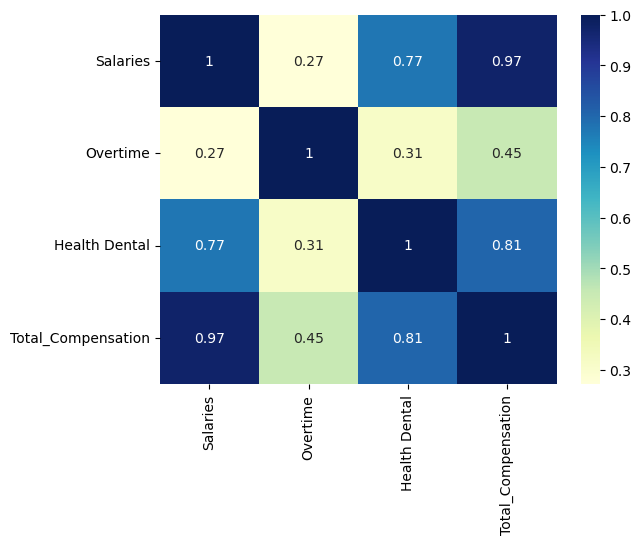

In [73]:
# Checking for colinearity
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

# Observation
* There is more correlation betwen the salaries and health Dental so i can drop that

In [214]:
df=df.drop(columns='Health Dental')
df

,Salaries,Overtime,Total_Compensation
0,12196,0,16158
1,74639,2820,115784
2,100554,0,144708
3,140164,52754,242323
4,58813,0,82106
...,...,...,...
287831,78980,30115,147079
287832,30704,0,40174
287833,104451,0,164669
287834,14425,0,19594


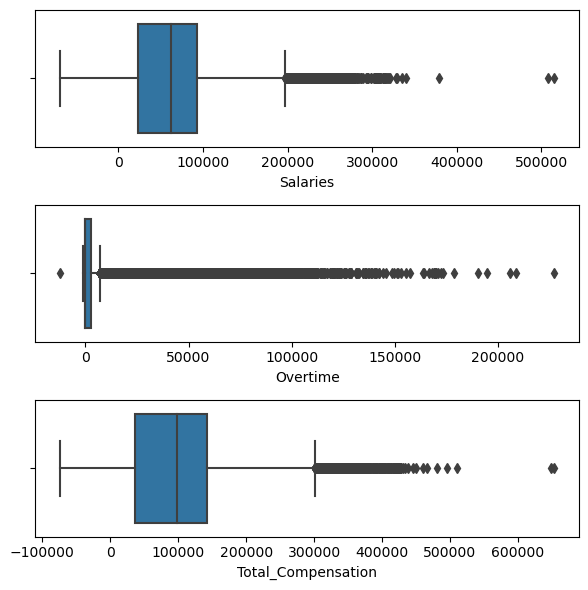

In [161]:
# Checking for outliers now
fig,axis=plt.subplots(3,figsize=(6,6))
sns.boxplot(x=df['Salaries'],ax=axis[0])
sns.boxplot(x=df['Overtime'],ax=axis[1])
sns.boxplot(x=df['Total_Compensation'],ax=axis[2])
plt.tight_layout()
plt.show()

# Observation 
- My data has negetive values they all should go positive
- There is more than 200000 rupees that paid for overtime we can drop the column

In [215]:
neget_val=df[(df['Salaries']<0) &(df['Total_Compensation']<0)].index
df=df.drop(index=neget_val)

In [216]:
#plt.subplots(2,figsize=(6,6))
#sns.boxplot(x=df['Salaries'],ax=axis[0])
#sns.boxplot(x=df['Total_Compensation'],ax=axis[1])
#sns.boxplot(x=df['Salaries'],ax=axis[0])

<Axes: xlabel='Total_Compensation'>

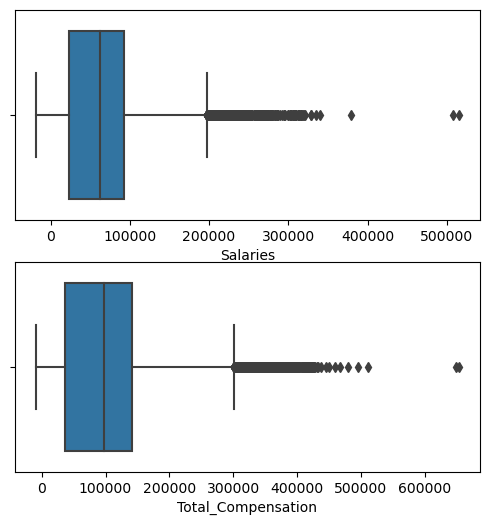

In [163]:
fig,axis=plt.subplots(2,figsize=(6,6))
sns.boxplot(x=df['Salaries'],ax=axis[0])
sns.boxplot(x=df['Total_Compensation'],ax=axis[1])

<Axes: >

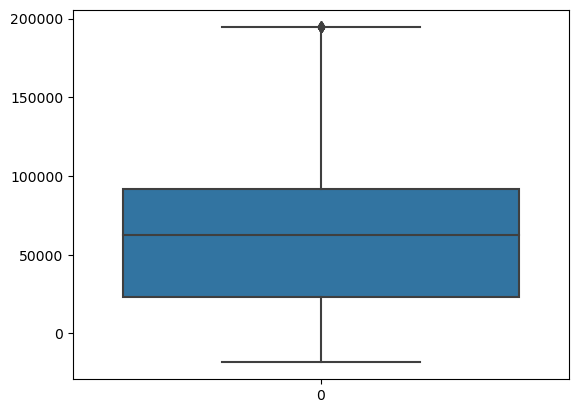

In [217]:
# Dealing the outlier in the Salary column
sal=df['Salaries']
df['Salaries']=np.where(sal<(Q1-1.5*IQR),IQR,df["Salaries"])
df['Salaries']=np.where(sal>(Q3+1.5*IQR),IQR,df["Salaries"])
sns.boxplot(df['Salaries'])

In [218]:
Q1=df['Salaries'].quantile(0.25)
Q3=df['Salaries'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
print(Q1)
print(Q3)

68539.0
23423.0
91962.0


In [219]:
# Dealing the outliers in column Total_Compensation
QQ1=df['Total_Compensation'].quantile(0.25)
QQ3=df['Total_Compensation'].quantile(0.75)
IQR2=QQ3-QQ1

In [220]:
tot=df['Total_Compensation']
df['Total_Compensation']=np.where((tot<QQ1-1.5*IQR2),IQR,df['Total_Compensation'])
df['Total_Compensation']=np.where((tot>QQ3+1.5*IQR2),IQR,df['Total_Compensation'])

<Axes: xlabel='Total_Compensation'>

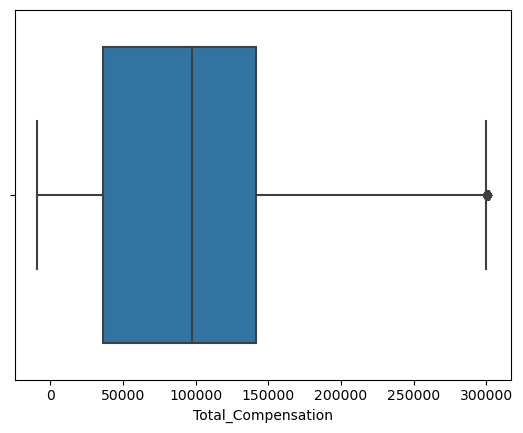

In [192]:
sns.boxplot(x=df['Total_Compensation'])

In [221]:
df=df.drop(columns='Overtime')

In [222]:
df.sample(10)

,Salaries,Total_Compensation
217446,54572.0,82130.0
128374,16416.0,24245.0
127644,113700.0,172161.0
62126,5051.0,7555.0
201590,96861.0,153702.0
270674,148749.0,266118.0
79233,1879.0,3072.0
216782,54622.0,88792.0
285977,52728.0,82268.0
76812,103324.0,185152.0


In [224]:
# Feater scaling
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms

MinMaxScaler()

In [230]:
df['Total_Compensation']=mms.fit_transform(df[['Total_Compensation']])
df['Salaries']=mms.fit_transform(df[['Salaries']])

In [232]:
df.sample(6)

,Salaries,Total_Compensation
134106,0.205206,0.250408
232950,0.243325,0.204745
12225,0.231689,0.185440
46680,0.636933,0.596837
117824,0.093404,0.036159
241944,0.109824,0.052453


In [273]:
# Seperate x and y 
x=df.drop('Total_Compensation',axis=1)
y=df['Total_Compensation']

In [274]:
# Spliting data fro train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=45,test_size=0.3)

In [275]:
# Applying linear regerssion
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

In [276]:
lr.fit(x_train,y_train)

LinearRegression()

In [277]:
y_pred=lr.predict(x_test)
y_pred

array([0.33855137, 0.17174502, 0.11027046, ..., 0.7460261 , 0.45770694,
       0.04480672])

In [247]:
x_test

,Salaries
146528,0.374760
3709,0.210996
204637,0.150643
91815,0.780281
227868,0.240805
...,...
230344,0.696986
146930,0.465438
28426,0.774805
283616,0.491743


In [278]:
#Check the accuracy of the model now
from sklearn.metrics import r2_score
r2_score(x_test,y_test)

0.8683106140641197

In [279]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,y_test))

0.07301936015438634

In [280]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_train,y_train))

0.07341326776535899

# Observation
- Our model is not biased

In [290]:
# coordinates
lr.coef_

array([1.0185747])

In [291]:
lr.intercept_

-0.04317018606191658